In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/Dota_Simulator

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/Dota_Simulator')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/12QFJyRnVhjFL-I5c6E5gyBMOyT_jFnQS/Dota_Simulator


In [0]:
import torch
import joblib
import importlib
import warnings
dotasimlib = importlib.import_module("DOTA_simulator")

In [0]:
dotasimlib= importlib.reload(dotasimlib)

In [10]:
sim = dotasimlib.DotaSim()
sim.load_data("games_data/rd_cumulated_*");

4 Files to load
games_data/rd_cumulated_1.csv   	Imported: 13234 lines
games_data/rd_cumulated_2.csv   	Imported: 12884 lines
games_data/rd_cumulated_3.csv   	Imported: 13229 lines
games_data/rd_cumulated_4.csv   	Imported: 25067 lines
64414 Lines in the dataset


In [11]:
sim.set_model('ffnet')

Using CUDA
Model dimensions: (210, 23) => 210
Model type:
 FFNet(
  (input_layer): Input(
    (layer): Linear(in_features=233, out_features=256, bias=True)
  )
  (hidden): ModuleList(
    (0): Linear(in_features=256, out_features=256, bias=True)
  )
  (output_layer): Output(
    (layer): Linear(in_features=256, out_features=210, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)


Training...
> 1 	/ 200 	Train Loss: 0.7168  	| Validation Loss: 0.6588
> 2 	/ 200 	Train Loss: 0.6416  	| Validation Loss: 0.6405
> 3 	/ 200 	Train Loss: 0.6290  	| Validation Loss: 0.6309
> 4 	/ 200 	Train Loss: 0.6217  	| Validation Loss: 0.6244
> 5 	/ 200 	Train Loss: 0.6173  	| Validation Loss: 0.6205
> 6 	/ 200 	Train Loss: 0.6128  	| Validation Loss: 0.6170
> 7 	/ 200 	Train Loss: 0.6113  	| Validation Loss: 0.6155
> 8 	/ 200 	Train Loss: 0.6097  	| Validation Loss: 0.6154
> 9 	/ 200 	Train Loss: 0.6077  	| Validation Loss: 0.6137
> 10 	/ 200 	Train Loss: 0.6065  	| Validation Loss: 0.6134
> 11 	/ 200 	Train Loss: 0.6053  	| Validation Loss: 0.6126
> 12 	/ 200 	Train Loss: 0.6039  	| Validation Loss: 0.6111
> 13 	/ 200 	Train Loss: 0.6031  	| Validation Loss: 0.6091
> 14 	/ 200 	Train Loss: 0.6038  	| Validation Loss: 0.6097
> 15 	/ 200 	Train Loss: 0.6024  	| Validation Loss: 0.6102
> 16 	/ 200 	Train Loss: 0.6020  	| Validation Loss: 0.6099
> 17 	/ 200 	Train Loss: 0.6006  	| V

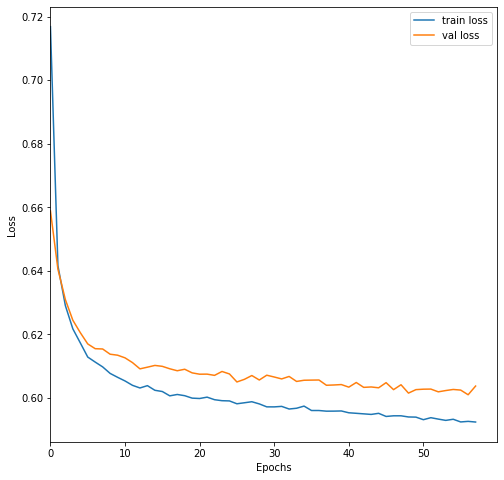

In [12]:
sim.train(epochs=200, batch_size=128, limit_overfit=5)

In [0]:
sim.save_model("trained_model")

In [14]:
import time
t0 = time.time()
sim.reset()
sim.render()
for i in range(100):
    sim.step(0)
    sim.render()
print("Run time: %.2f s" %(time.time()-t0))

Env Reset
0 > Time: 0 | (-6700 , -6700)
1 > Time: 2 | (-2771 , -6834)
2 > Time: 50 | (-2771 , -5391)
3 > Time: 65 | (-2771 , -2560)
4 > Time: 126 | (-2771 , -2766)
5 > Time: 126 | (-2978 , -2560)
6 > Time: 126 | (-2771 , -2560)
7 > Time: 126 | (-2771 , -2717)
8 > Time: 126 | (-2771 , -2131)
9 > Time: 117 | (-2617 , -2560)
10 > Time: 126 | (-2197 , -2560)
11 > Time: 126 | (-2771 , -2560)
12 > Time: 126 | (-2771 , -1920)
13 > Time: 126 | (-2771 , -2560)
14 > Time: 126 | (-2771 , -2116)
15 > Time: 120 | (-2771 , -2321)
16 > Time: 126 | (-2325 , -2560)
17 > Time: 126 | (-2771 , -2560)
18 > Time: 126 | (-2428 , -2560)
19 > Time: 118 | (-2293 , -2560)
20 > Time: 117 | (-2771 , -2560)
21 > Time: 118 | (-2707 , -2013)
22 > Time: 126 | (-2390 , -2560)
23 > Time: 127 | (-2771 , -2560)
24 > Time: 126 | (-2587 , -2560)
25 > Time: 126 | (-2317 , -2560)
26 > Time: 126 | (-2771 , -2560)
27 > Time: 115 | (-3018 , -2560)
28 > Time: 126 | (-2976 , -1934)
29 > Time: 126 | (-2505 , -1177)
30 > Time: 135 |